I've had trouble using MCMC (HMC specifically) with models that include both Normally- and Uniformly-distributed variables. I'd like to reproduce / investigate those and make sure I expect things to work well.

In [35]:
import numpy
import matplotlib.pyplot as plt

import torch
import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.infer import MCMC, NUTS, HMC

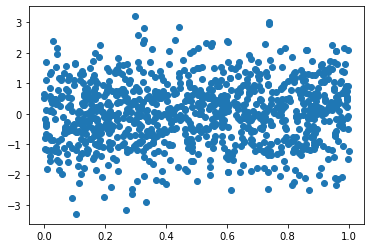

In [24]:
def model():
    # Sample a latent 2D point, where X is uniform in [0, 1], and Y is a unit normal.
    x = pyro.sample("x", dist.Uniform(0, 1))
    y = pyro.sample("y", dist.Normal(0, 1))
    return torch.stack([x, y], axis=-1)

with pyro.plate("batch", 1000):
    data = model()
plt.scatter(data[:, 0], data[:, 1])
plt.title("Samples")

Sample: 100%|██████████| 1010/1010 [00:09, 110.02it/s, step size=9.05e-01, acc. prob=0.934]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         x      0.50      0.29      0.51      0.06      0.94    428.29      1.00
         y      0.02      1.01      0.01     -1.58      1.67   1038.89      1.00

Number of divergences: 0


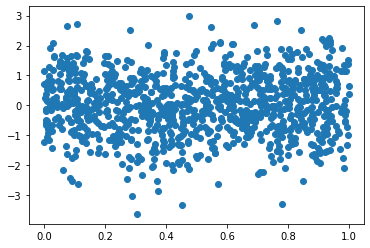

In [37]:
kernel = NUTS(
    model,
    full_mass=True,
)

mcmc = MCMC(
    kernel,
    num_samples=1000,
    warmup_steps=10,
)
mcmc.run()
mcmc.summary()
samples = mcmc.get_samples()
plt.scatter(samples["x"], samples["y"])